# MPU9250 IMU Analysis

This notebook analyses the signals output by an Invensense MPU9250 6-axis IMU and 3-axis magnetometer.  The signals were recorded while the IMU was stationary (well, compared to the lab frame of reference).

## 0. Setup

In [1]:
import matplotlib
%matplotlib inline

In [2]:
from matplotlib.pyplot import subplots, rcParams, tight_layout
import scipy.signal as sig
import numpy as np

## Load csv data
data = np.loadtxt('imudata.csv', skiprows=4, delimiter=',')

t = data[:,0] * 1e-6

a_x_raw = data[:,1]
a_y_raw = data[:,2]
a_z_raw = data[:,3]
omega_x_raw = data[:,4]
omega_y_raw = data[:,5]
omega_z_raw = data[:,6]

# Estimate average sampling frequency
dt = (t[-1] - t[0]) / (len(t) - 1)
fs = 1 / dt

# Configure plots
rcParams['figure.figsize'] = (12, 4)
rcParams['figure.dpi'] = 100
tight_layout()

<Figure size 1200x400 with 0 Axes>

## 1. Raw time sequences

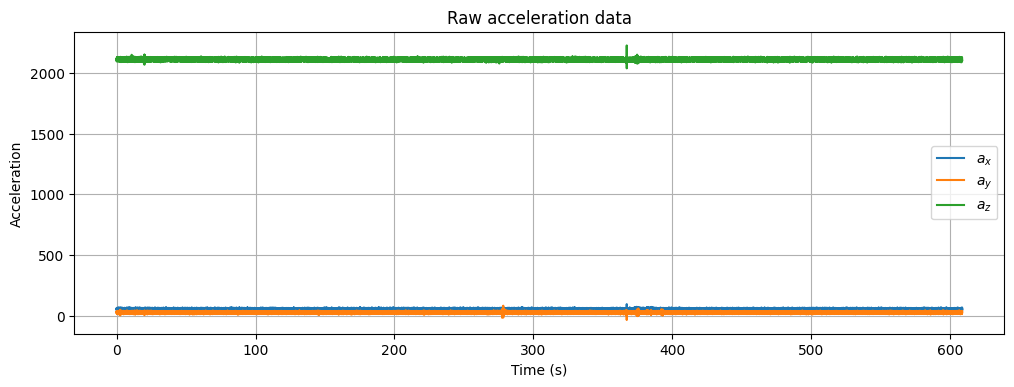

In [3]:
fig, axes = subplots(1)
axes.plot(t, a_x_raw, label='$a_x$')
axes.plot(t, a_y_raw, label='$a_y$')
axes.plot(t, a_z_raw, label='$a_z$')
axes.set_title('Raw acceleration data')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Acceleration')
axes.legend(loc='center right')
axes.grid(True)

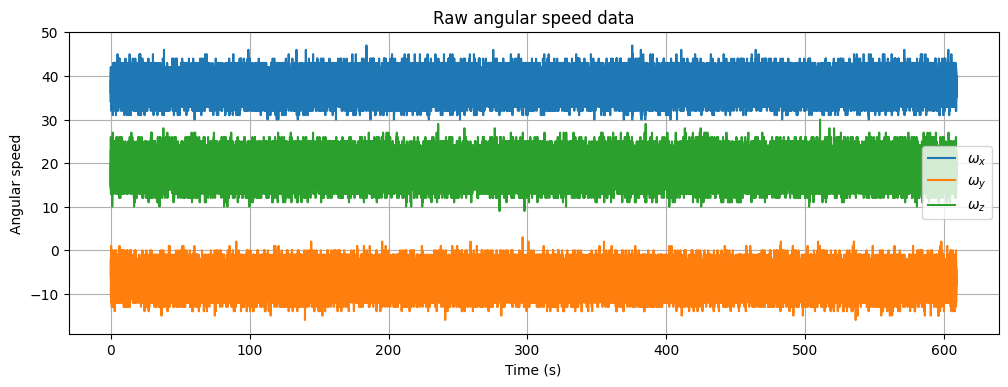

In [4]:
fig, axes = subplots(1)
axes.plot(t, omega_x_raw, label='$\omega_x$')
axes.plot(t, omega_y_raw, label='$\omega_y$')
axes.plot(t, omega_z_raw, label='$\omega_z$')
axes.set_title('Raw angular speed data')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Angular speed')
axes.legend(loc='center right')
axes.grid(True)

## 2. Calibrated time sequences

In [5]:
# The scale factors should be determined from calibration and depend on the programmed range.

# Scale accelerations to get m/s^2
a_range = 16 - -16
a_adc_bits = 16
a_scale = a_range * 9.81 / 2**a_adc_bits

a_x = a_x_raw * a_scale
a_y = a_y_raw * a_scale
a_z = a_z_raw * a_scale

# Scale angular speeds to get deg/s
omega_range = 2000 - -2000
omega_adc_bits = 16
omega_scale = omega_range / 2**omega_adc_bits

omega_x = omega_x_raw * omega_scale
omega_y = omega_y_raw * omega_scale
omega_z = omega_z_raw * omega_scale

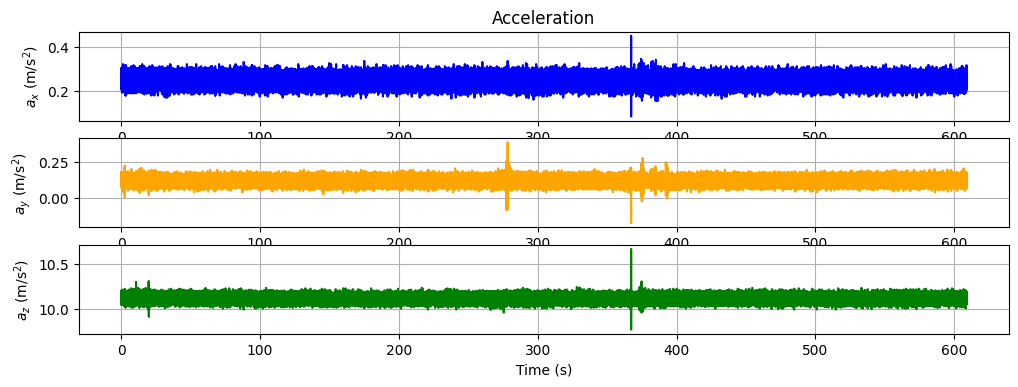

In [6]:
fig, axes = subplots(3)
axes[0].plot(t, a_x, label='$a_x$', color='blue')
axes[1].plot(t, a_y, label='$a_y$', color='orange')
axes[2].plot(t, a_z, label='$a_z$', color='green')
axes[0].set_title('Acceleration')
axes[2].set_xlabel('Time (s)')
axes[0].set_ylabel('$a_x$ (m/s$^2$)')
axes[1].set_ylabel('$a_y$ (m/s$^2$)')
axes[2].set_ylabel('$a_z$ (m/s$^2$)')
for ax in axes: 
    ax.grid(True)

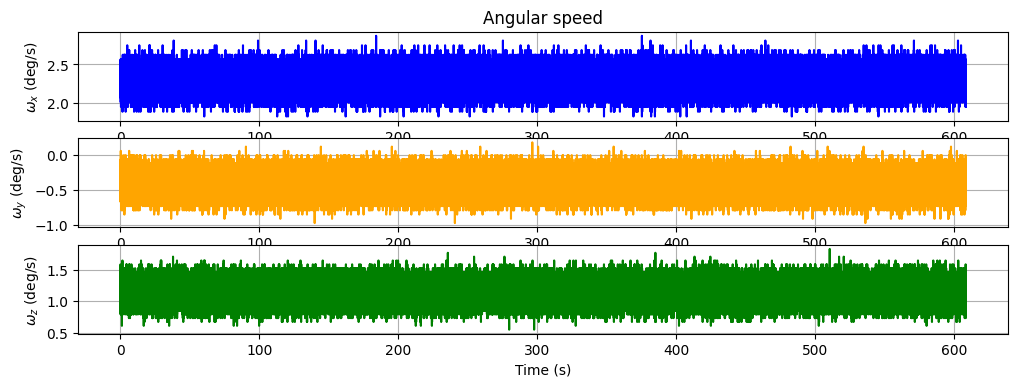

In [7]:
fig, axes = subplots(3)
axes[0].plot(t, omega_x, label='$\omega_x$', color='blue')
axes[1].plot(t, omega_y, label='$\omega_y$', color='orange')
axes[2].plot(t, omega_z, label='$\omega_z$', color='green')
axes[0].set_title('Angular speed')
axes[2].set_xlabel('Time (s)')
axes[0].set_ylabel('$\omega_x$ (deg/s)')
axes[1].set_ylabel('$\omega_y$ (deg/s)')
axes[2].set_ylabel('$\omega_z$ (deg/s)')
for ax in axes: 
    ax.grid(True)

## 3. Histograms 

Histograms are useful to show how the amplitudes of a noise signal are distributed.  They can be normalised to estimate the probability density function (PDF).  Most electronic noise has a Gaussian probability density function.

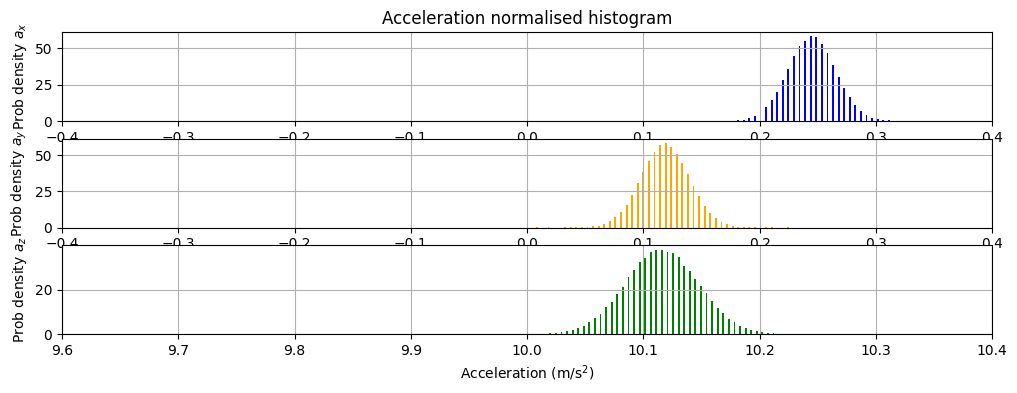

In [8]:
fig, axes = subplots(3)
a_all = np.array((a_x, a_y, a_z))
#a_min, a_max = a_all.min(), a_all.max()
a_min, a_max = -0.4, 0.4
axes[0].hist(a_x, bins=500, range=(a_min, a_max), density=True, color='blue')
axes[1].hist(a_y, bins=500, range=(a_min, a_max), density=True, color='orange')
axes[2].hist(a_z, bins=500, range=(a_min + 10, a_max + 10), density=True, color='green')
axes[0].set_title('Acceleration normalised histogram')
axes[2].set_xlabel('Acceleration (m/s$^2$)')
axes[0].set_ylabel('Prob density $a_x$')
axes[1].set_ylabel('Prob density $a_y$')
axes[2].set_ylabel('Prob density $a_z$')
for ax, offset in zip(axes, (0, 0, 10)):
   ax.set_xlim(a_min + offset, a_max + offset)
   ax.grid(True)

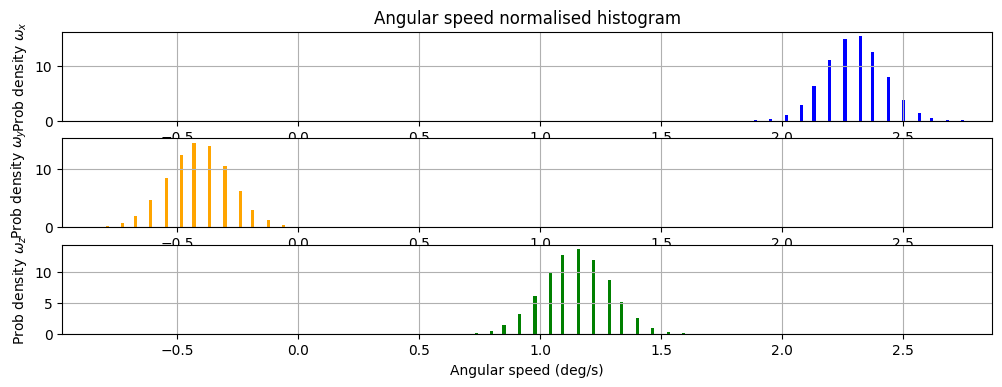

In [9]:
fig, axes = subplots(3)
omega_all = np.array((omega_x, omega_y, omega_z))
omega_min, omega_max = omega_all.min(), omega_all.max()
axes[0].hist(omega_x, bins=300, range=(omega_min, omega_max), density=True, color='blue')
axes[1].hist(omega_y, bins=300, range=(omega_min, omega_max), density=True, color='orange')
axes[2].hist(omega_z, bins=300, range=(omega_min, omega_max), density=True, color='green')
axes[0].set_title('Angular speed normalised histogram')
axes[2].set_xlabel('Angular speed (deg/s)')
axes[0].set_ylabel('Prob density $\omega_x$')
axes[1].set_ylabel('Prob density $\omega_y$')
axes[2].set_ylabel('Prob density $\omega_z$')
for ax in axes:
   ax.set_xlim(omega_min, omega_max)
   ax.grid(True)

## 4. Statistics

In [10]:
print('means:  a_x = %.3f a_y=%.3f a_z=%.3f' % (a_x.mean(), a_y.mean(), a_z.mean()))
print('std devs: a_x = %.3f a_y=%.3f a_z=%.3f' % (a_x.std(), a_y.std(), a_z.std()))
print('means:  omega_x = %.3f omega_y=%.3f omega_z=%.3f' % (omega_x.mean(), omega_y.mean(), omega_z.mean()))
print('std devs: omega_x = %.3f omega_y=%.3f omega_z=%.3f' % (omega_x.std(), omega_y.std(), omega_z.std()))
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print('corr coeffs:\n', np.corrcoef((a_x, a_y, a_z, omega_x, omega_y, omega_z)))

means:  a_x = 0.245 a_y=0.119 a_z=10.116
std devs: a_x = 0.020 a_y=0.021 a_z=0.031
means:  omega_x = 2.299 omega_y=-0.412 omega_z=1.151
std devs: omega_x = 0.121 omega_y=0.129 omega_z=0.138
corr coeffs:
 [[1.000 0.006 0.003 -0.003 -0.002 -0.001]
 [0.006 1.000 -0.020 -0.003 -0.001 0.000]
 [0.003 -0.020 1.000 0.005 -0.002 -0.000]
 [-0.003 -0.003 0.005 1.000 -0.008 0.016]
 [-0.002 -0.001 -0.002 -0.008 1.000 -0.013]
 [-0.001 0.000 -0.000 0.016 -0.013 1.000]]


## 5. Amplitude spectral density

The amplitude spectral density (ASD) shows the frequency dependence of the noise.  It is the square root of the power spectral density (PSD). If a signal has units V, the units of the PSD are V$^2$ / Hz and the units of the ASD are V / $\sqrt{\mathrm{Hz}}$.  

In [11]:
def PSD(x, fs):
    """Estimate PSD of signal x with sampling frequency fs"""
    
    # Estimate PSD using Welch's method
    return sig.welch(x, fs)

def ASD(x, fs):
    """Estimate ASD of signal x with sampling frequency fs"""
    
    f, Px = PSD(x, fs)

    return f, np.sqrt(Px)

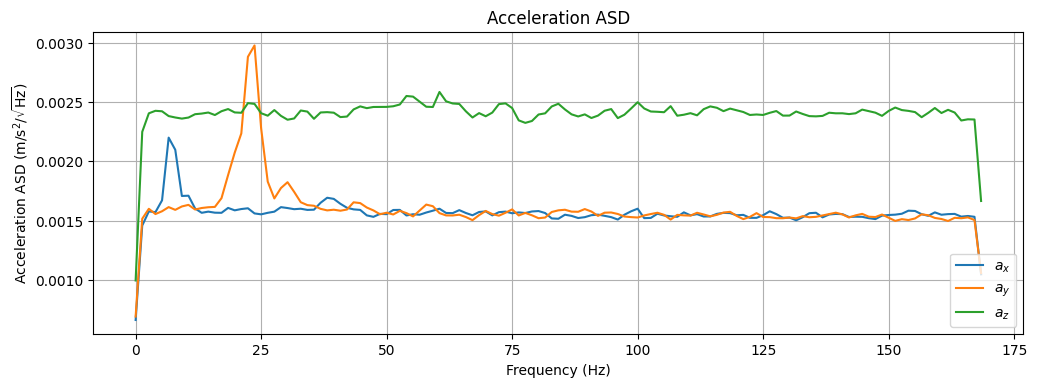

In [12]:
# Estimate amplitude spectral density (ASD) of accelerations
f, Aa_x = ASD(a_x, fs)
f, Aa_y = ASD(a_y, fs)
f, Aa_z = ASD(a_z, fs)

fig, axes = subplots(1)
axes.plot(f, Aa_x, label='$a_x$')
axes.plot(f, Aa_y, label='$a_y$')
axes.plot(f, Aa_z, label='$a_z$')
axes.set_title('Acceleration ASD')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Acceleration ASD (m/s$^2$/$\sqrt{\mathrm{Hz}}$)')
axes.legend(loc='lower right')
axes.grid(True)

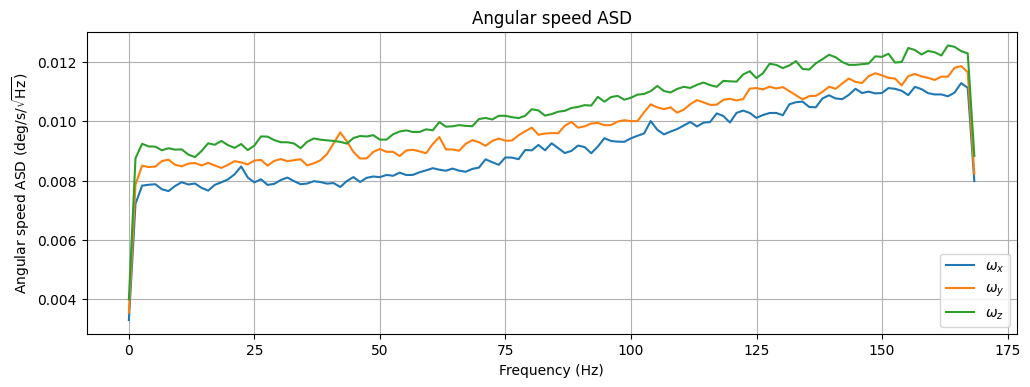

In [13]:
# Estimate amplitude spectral density (ASD) of angular speeds
f, Aomega_x = ASD(omega_x, fs)
f, Aomega_y = ASD(omega_y, fs)
f, Aomega_z = ASD(omega_z, fs)

fig, axes = subplots(1)
axes.plot(f, Aomega_x, label='$\omega_x$')
axes.plot(f, Aomega_y, label='$\omega_y$')
axes.plot(f, Aomega_z, label='$\omega_z$')
axes.set_title('Angular speed ASD')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Angular speed ASD (deg/s/$\sqrt{\mathrm{Hz}}$)')
axes.legend(loc='lower right')
axes.grid(True)

## 6. Integrated signals

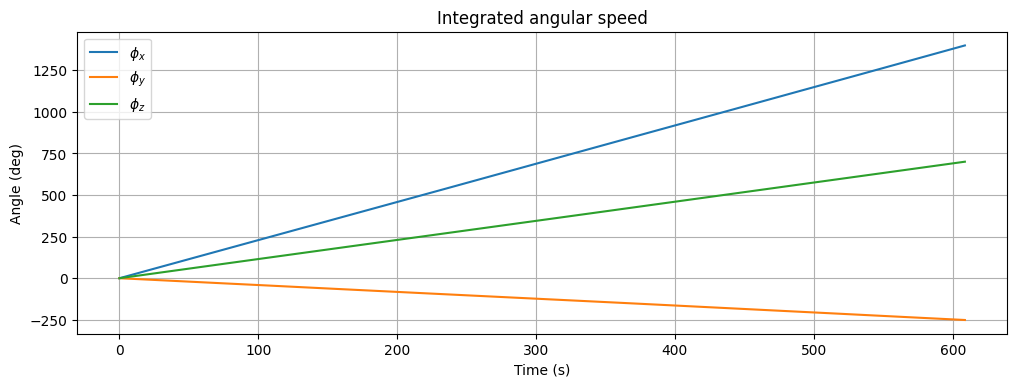

In [14]:
# Integrate angular speed to get angle
from scipy.integrate import cumtrapz

theta_x = cumtrapz(omega_x, t, initial=0)
theta_y = cumtrapz(omega_y, t, initial=0)
theta_z = cumtrapz(omega_z, t, initial=0)

fig, axes = subplots(1)
axes.plot(t, theta_x, label='$\phi_x$')
axes.plot(t, theta_y, label='$\phi_y$')
axes.plot(t, theta_z, label='$\phi_z$')
axes.set_title('Integrated angular speed')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Angle (deg)')
axes.legend(loc='upper left')
axes.grid(True)

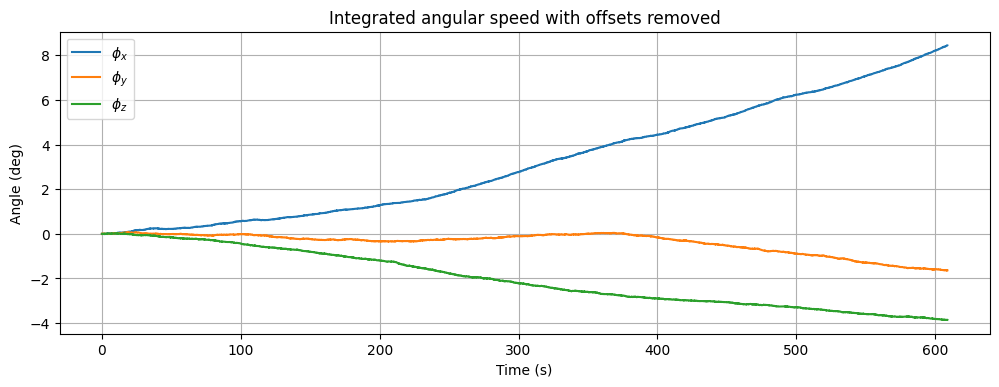

In [15]:
# Integrate angular speed to get angle
from scipy.integrate import cumtrapz

# Estimate angular speed offsets
Nm = 1000
omega_x_offset = omega_x[0:Nm].mean()
omega_y_offset = omega_y[0:Nm].mean()
omega_z_offset = omega_z[0:Nm].mean()

theta_x = cumtrapz(omega_x - omega_x_offset, t, initial=0)
theta_y = cumtrapz(omega_y - omega_y_offset, t, initial=0)
theta_z = cumtrapz(omega_z - omega_z_offset, t, initial=0)

fig, axes = subplots(1)
axes.plot(t, theta_x, label='$\phi_x$')
axes.plot(t, theta_y, label='$\phi_y$')
axes.plot(t, theta_z, label='$\phi_z$')
axes.set_title('Integrated angular speed with offsets removed')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Angle (deg)')
axes.legend(loc='upper left')
axes.grid(True)

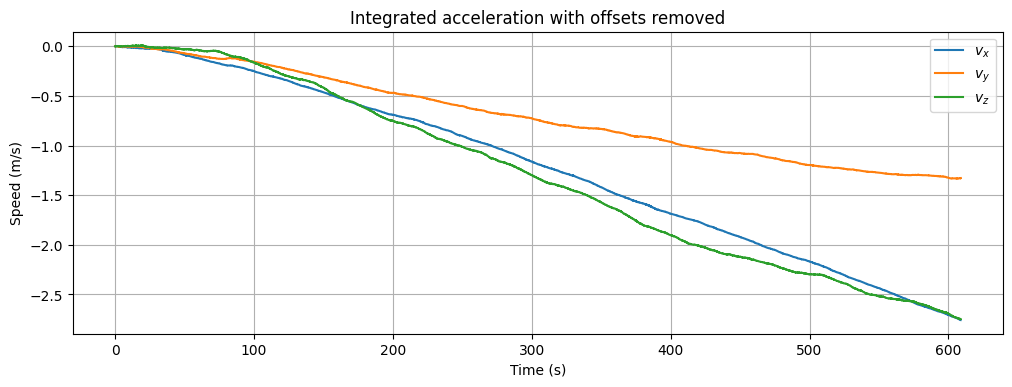

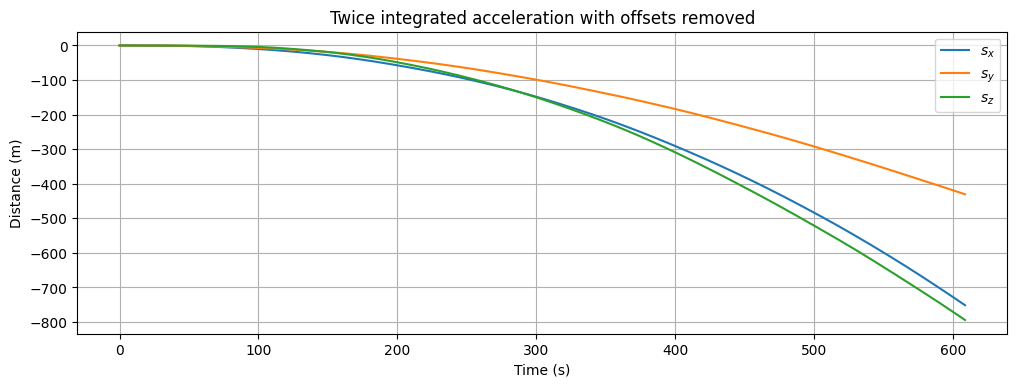

In [16]:
# Integrate acceleration to get speed
from scipy.integrate import cumtrapz

# Estimate acceleration offsets
Nm = 1000
a_x_offset = a_x[0:Nm].mean()
a_y_offset = a_y[0:Nm].mean()
a_z_offset = a_z[0:Nm].mean()

v_x = cumtrapz(a_x - a_x_offset, t, initial=0)
v_y = cumtrapz(a_y - a_y_offset, t, initial=0)
v_z = cumtrapz(a_z - a_z_offset, t, initial=0)

fig, axes = subplots(1)
axes.plot(t, v_x, label='$v_x$')
axes.plot(t, v_y, label='$v_y$')
axes.plot(t, v_z, label='$v_z$')
axes.set_title('Integrated acceleration with offsets removed')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Speed (m/s)')
axes.legend(loc='upper right')
axes.grid(True)

# Integrate speed to get distance
from scipy.integrate import cumtrapz

# Estimate speed offsets
Nm = 1000
v_x_offset = v_x[0:Nm].mean()
v_y_offset = v_y[0:Nm].mean()
v_z_offset = v_z[0:Nm].mean()

s_x = cumtrapz(v_x - v_x_offset, t, initial=0)
s_y = cumtrapz(v_y - v_y_offset, t, initial=0)
s_z = cumtrapz(v_z - v_z_offset, t, initial=0)

fig, axes = subplots(1)
axes.plot(t, s_x, label='$s_x$')
axes.plot(t, s_y, label='$s_y$')
axes.plot(t, s_z, label='$s_z$')
axes.set_title('Twice integrated acceleration with offsets removed')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Distance (m)')
axes.legend(loc='upper right')
axes.grid(True)

## 7. Differentiated signals

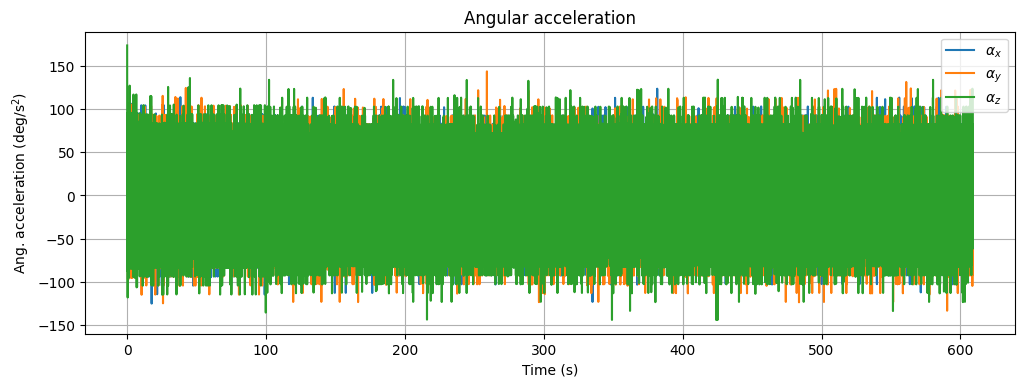

In [17]:
# Differentiate angular speed to get angular acceleration
alpha_x = np.gradient(omega_x, t)
alpha_y = np.gradient(omega_y, t)
alpha_z = np.gradient(omega_z, t)

fig, axes = subplots(1)
axes.plot(t, alpha_x, label='$\\alpha_x$')
axes.plot(t, alpha_y, label='$\\alpha_y$')
axes.plot(t, alpha_z, label='$\\alpha_z$')
axes.set_title('Angular acceleration')
axes.set_xlabel('Time (s)')
axes.set_ylabel('Ang. acceleration (deg/s$^2$)')
axes.legend(loc='upper right')
axes.grid(True)

## 8. Gyroscope drift

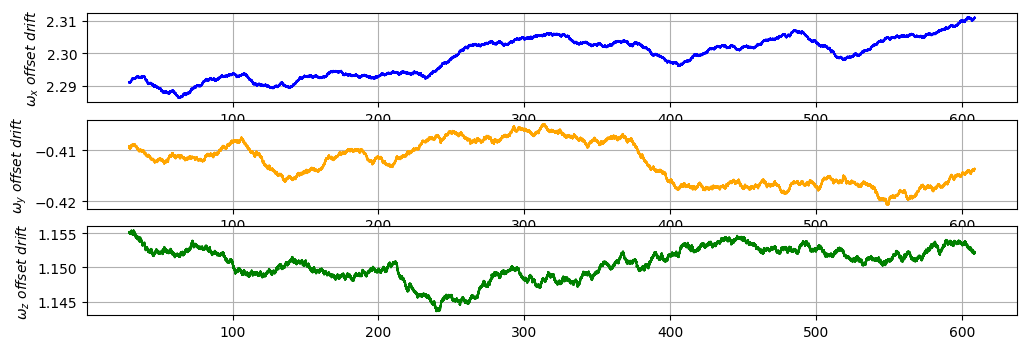

In [24]:
# TODO: Write some Python code to estimate and plot the drift of the gyroscope offsets.
#
# Estimate angular speed offsets

Nm = 10000
omega_x_offset_drift = []
omega_y_offset_drift = []
omega_z_offset_drift = []
for i in range(len(t)):
    omega_x_offset_drift.append(omega_x[max(0, i-Nm):i+1].mean())
    omega_y_offset_drift.append(omega_y[max(0, i-Nm):i+1].mean())
    omega_z_offset_drift.append(omega_z[max(0, i-Nm):i+1].mean())

t_drift = t[0: len(t) - Nm + 1]

fig, axes = subplots(3)
axes[0].plot(t[Nm::], omega_x_offset_drift[Nm::], color='blue')
axes[1].plot(t[Nm::], omega_y_offset_drift[Nm::], color='orange')
axes[2].plot(t[Nm::], omega_z_offset_drift[Nm::], color='green')
axes[0].set_ylabel('$\\omega_x\ offset\ drift$')
axes[1].set_ylabel('$\\omega_y\ offset\ drift$')
axes[2].set_ylabel('$\\omega_z\ offset\ drift$')

for axis in axes:
    axis.grid(True)